<div style="font-size:16px; color:darkblue;">
    https://www.kaggle.com/jtrofe/beer-recipes
</div>

<div style="font-size:16px; color:darkblue;">
    BeerID - Record ID<br/>
    Name - Name<br/>
    URL - Location of recipe webpage at https://www.brewersfriend.com<br/>
    Style - Type of brew<br/>
    StyleID - Numeric ID for type of brew<br/>
    Size(L) - Amount brewed for recipe listed<br/>
    OG - Specific gravity of wort before fermentation<br/>
    FG - Specific gravity of wort after fermentation<br/>
    ABV - Alcohol By Volume<br/>
    IBU - International Bittering Units<br/>
    Color - Standard Reference Method - light to dark ex. 40 = black<br/>
    BoilSize - Fluid at beginning of boil<br/>
    BoilTime - Time wort is boiled<br/>
    BoilGravity - Specific gravity of wort before the boil<br/>
    Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash<br/>
    MashThickness - Amount of water per pound of grain<br/>
    SugarScale - Scale to determine the concentration of dissolved solids in wort<br/>
    BrewMethod - Various techniques for brewing<br/>
    PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P<br/>
    PrimaryTemp - Temperature at the fermenting stage<br/>
    PrimingMethod - Priming method used, e.g., corn sugar<br/>
    PrimingAmount - Amount of priming sugar used<br/>
    UserId
</div>

In [198]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pylab import *
import matplotlib.pylab

import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import scipy.stats as stats
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig

from pandas.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams

import collections
import wordcloud
from wordcloud import WordCloud

pylab.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_rows = 20
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [199]:
!type recipeData.csv

ï»¿BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70,N/A,Specific Gravity,All Grain,N/A,17.78,corn sugar,4.5 oz,116
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.07,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,955
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-extract,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,N/A,70,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-all-grain,American IPA,7,22.71,1.061,1.017,5.8,54.48,8.5,26.5,60,N/A,70,N/A,Specific Gravity,All Grain,N/A,N/A,N/A

3154,???-LICHTENSTEIN PALE ALE-??,/homebrew/recipe/view/327521/-lichtenstein-pale-ale-,Blonde Ale,30,23,1.047,1.01,4.86,29.41,9.51,35,75,1.031,72,24,Specific Gravity,All Grain,N/A,19,N/A,N/A,
3155,Dirty Brown Arse,/homebrew/recipe/view/119247/dirty-brown-arse,American Brown Ale,6,30.28,1.062,1.02,5.55,20.61,20.41,37.85,60,1.05,75,N/A,Specific Gravity,All Grain,N/A,21.11,N/A,N/A,19102
3156,Gruit II,/homebrew/recipe/view/6096/gruit-ii,Specialty Beer,145,18.93,1.092,1.03,8.16,0,16.5,22.71,40,N/A,70,N/A,Specific Gravity,Partial Mash,N/A,N/A,N/A,N/A,
3157,Biere de Noel,/homebrew/recipe/view/303878/biere-de-noel,BiÃ¨re de Garde,29,18.93,1.058,1.013,5.89,33.95,26.24,26.5,90,1.041,70,N/A,Specific Gravity,All Grain,0.5,19.44,N/A,N/A,
3158,ESB House Special,/homebrew/recipe/view/36891/esb-house-special,Extra Special/Strong Bitter (ESB),68,19.87,1.056,1.014,5.47,165.79,8.8,15.14,70,1.073,70,N/A,Specific Gravity,Partial Mash,0.75,20,sugar,1 cup,10101
3159,Helles Bock ?? ????????,/homebrew/recipe/v

5653,Strict Observance Tripel,/homebrew/recipe/view/191263/strict-observance-tripel,Belgian Tripel,26,20.82,1.087,1.022,8.51,0,3.68,27.44,90,N/A,75,N/A,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
5654,BOB (Black On Black) Tier 8,/homebrew/recipe/view/225317/bob-black-on-black-tier-8,Clone Beer,43,24.61,1.061,1.015,6.03,74.51,29.69,32.18,90,1.046,78,1.5,Specific Gravity,All Grain,0.75,20,N/A,N/A,19498
5655,Brutally Brown,/homebrew/recipe/view/87611/brutally-brown,American Brown Ale,6,19.87,1.06,1.016,5.82,32.1,21.76,22.71,60,1.045,70,N/A,Specific Gravity,BIAB,0.35,18.33,N/A,N/A,20675
5656,Stella Clone,/homebrew/recipe/view/226123/stella-clone,German Pilsner (Pils),81,20.82,1.043,1.009,4.41,23.23,3,24.61,60,1.036,65,1.25,Specific Gravity,All Grain,0.35,20.56,N/A,N/A,
5657,Citrona Ale,/homebrew/recipe/view/11597/citrona-ale,American Amber Ale,4,20.82,1.053,1.012,5.32,51.56,5.62,26.5,60,1.042,72,N/A,Specific Gravity,All Grain,0.75,N/A,Keg Carb,2.3 vols,
5658,Rye ESB,/homebrew/recipe/view/3

8153,Ommegang Hennepin Clone w/ Honey,/homebrew/recipe/view/290164/ommegang-hennepin-clone-w-honey,Belgian Blond Ale,20,21.77,1.064,1.009,7.29,35.09,4.16,28.39,90,1.046,65,1.2,Specific Gravity,All Grain,0.75,20,N/A,N/A,
8154,Hey Pumpkin!,/homebrew/recipe/view/919/hey-pumpkin-,Fruit Beer,75,20.82,1.062,1.015,6.22,19.9,24.44,24.61,60,1.052,75,1.25,Specific Gravity,All Grain,0.35,21.11,N/A,N/A,
8155,Centennial Blonde,/homebrew/recipe/view/174242/centennial-blonde,Blonde Ale,30,20.82,1.039,1.008,4.11,21.02,3.94,26.99,60,1.03,80,1.25,Specific Gravity,All Grain,1,15.56,Force,N/A,29934
8156,BlackOut IIPA,/homebrew/recipe/view/27046/blackout-iipa,Imperial IPA,86,18.93,1.067,1.014,7.03,147.86,38.06,13.25,60,N/A,40,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
8157,Does This Pale Ale Make My Gut Look Big?,/homebrew/recipe/view/189880/does-this-pale-ale-make-my-gut-look-big-,American Pale Ale,10,18.93,1.052,1.008,5.81,0,10.75,18.93,60,N/A,75,N/A,Specific Gravity,Partial Mash,N/A,N/A,N/A,N/A,
8158

10652,Weisse Weed,/homebrew/recipe/view/174541/weisse-weed,Specialty Beer,145,20.82,1.063,1.017,6.06,43.02,4.08,28.39,60,1.047,75,N/A,Specific Gravity,All Grain,N/A,22.22,N/A,N/A,33447
10653,Batch 21 Pilsner Gahr Ed,/homebrew/recipe/view/226780/batch-21-pilsner-gahr-ed,Bohemian Pilsener,31,66.5,1.05,1.011,5.08,40.18,3.9,70,120,1.048,85,4.55,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
10654,Zvarte Fee Belgian Stout,/homebrew/recipe/view/167402/zvarte-fee-belgian-stout,Oatmeal Stout,114,11.36,1.053,1.016,4.91,24.09,40,15.14,60,1.04,65,N/A,Specific Gravity,BIAB,0.5,22.22,N/A,N/A,
10655,Biscuit IPA,/homebrew/recipe/view/240874/biscuit-ipa,American IPA,7,20.82,1.061,1.011,6.58,62.56,18.82,28.39,60,1.045,70,1.8,Specific Gravity,All Grain,0.5,20,N/A,N/A,43297
10656,Dreadnaught Light Imperial IPA,/homebrew/recipe/view/191210/dreadnaught-light-imperial-ipa,Imperial IPA,86,18.93,1.081,1.02,8,0,9.95,18.93,60,N/A,75,N/A,Specific Gravity,Partial Mash,N/A,N/A,N/A,N/A,
10657,Sour Cherry Stout,/homebr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




35148,Pale Ale 1,/homebrew/recipe/view/372859/pale-ale-1,American Pale Ale,10,19,1.047,1.008,5.13,50.02,6.53,18,60,1.05,75,N/A,Specific Gravity,BIAB,0.35,18,Natural,6g per 750ml bottle,67846
35149,SMASHED BLOND,/homebrew/recipe/view/411261/smashed-blond,Blonde Ale,30,18.93,1.045,1.01,4.61,16.16,3.28,28.39,60,1.03,70,1.25,Specific Gravity,All Grain,N/A,20,N/A,N/A,34076
35150,Dark Double IPA,/homebrew/recipe/view/312958/dark-double-ipa,Specialty IPA: Black IPA,148,23,1.089,1.02,9.15,43.1,35.55,28.5,60,1.072,75,2.61,Specific Gravity,All Grain,N/A,18,N/A,N/A,
35151,Anchor Steam - California Common,/homebrew/recipe/view/385662/anchor-steam-california-common,American Lager,8,24,1.052,1.016,4.77,29.83,7.7,29,60,1.043,75,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,
35152,Foreign Extra Stout,/homebrew/recipe/view/468608/foreign-extra-stout,Foreign Extra Stout,72,22.71,1.061,1.017,5.82,0,46.9,31.23,90,1.044,60,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,
35153,Box Head Pale Lager,/homebrew/recipe/v

37647,Best Bitter #1,/homebrew/recipe/view/373082/best-bitter-1,Best Bitter,28,12,1.04,1.009,4.06,32.24,10.05,15,60,1.032,70,5,Specific Gravity,All Grain,0.75,19,N/A,N/A,52062
37648,Blonde ale,/homebrew/recipe/view/353627/blonde-ale,Blonde Ale,30,21,1.041,1.008,4.25,22.56,3.84,24,60,1.036,70,2.3,Specific Gravity,All Grain,N/A,20,N/A,N/A,50933
37649,Wheat Beer,/homebrew/recipe/view/373597/wheat-beer,Weissbier,169,12,1.052,1.01,5.4,33.35,4.42,17,60,1.036,60,N/A,Specific Gravity,BIAB,N/A,20,N/A,N/A,
37650,Pliny the Elder,/homebrew/recipe/view/452701/pliny-the-elder,Double IPA,56,22.71,1.071,1.011,7.81,280.24,6.11,30.28,60,1.053,75,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,69272
37651,Light. IPA,/homebrew/recipe/view/229727/light-ipa,English IPA,65,18.93,1.042,1.01,4.26,40.38,9.23,26.5,60,1.03,70,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,
37652,Java the Slut,/homebrew/recipe/view/426335/java-the-slut,Imperial Stout,87,20.82,1.081,1.015,8.6,60.96,50,28.39,60,1.059,60,1.5,Specific Gravity,Al

40146,Rye Redux,/homebrew/recipe/view/281410/rye-redux,American Pale Ale,10,41.64,1.064,1.021,5.73,41.96,9.66,53,90,1.05,80,1.5,Specific Gravity,All Grain,0.35,18.33,N/A,N/A,
40147,Ihala Pale Ale,/homebrew/recipe/view/238916/ihala-pale-ale,American IPA,7,18,1.062,1.014,6.38,64.52,6,28.5,90,1.039,65,3,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
40148,Extract UKPA,/homebrew/recipe/view/274245/extract-ukpa,Extra Special/Strong Bitter (ESB),68,10.41,1.056,1.013,5.64,20.05,11.14,11.36,15,1.051,35,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
40149,Belgian Dubbel 2,/homebrew/recipe/view/387399/belgian-dubbel-2,Belgian Dubbel,22,18.93,1.07,1.011,7.69,24.75,15.43,13.25,60,1.054,65,N/A,Specific Gravity,Partial Mash,N/A,N/A,N/A,N/A,
40150,The White Headed Redhead,/homebrew/recipe/view/459080/the-white-headed-redhead,Belgian Blond Ale,20,1000,1.062,1.014,6.32,26.17,6.31,1100,60,1.055,85,2.25,Specific Gravity,All Grain,0.35,21,N/A,N/A,
40151,Hop Toxin,/homebrew/recipe/view/354376/hop-toxin,Double 

42603,American IPA,/homebrew/recipe/view/233894/american-ipa,American IPA,7,18.93,1.056,1.013,5.57,97.29,9.56,24.61,60,1.043,35,N/A,Specific Gravity,extract,N/A,18.33,N/A,N/A,
42604,B&W's King Charles the Thirst,/homebrew/recipe/view/334503/b-w-s-king-charles-the-thirst,Irish Red Ale,92,42,1.047,1.015,4.21,26.97,14.91,48,60,1.042,75,3,Specific Gravity,All Grain,N/A,19,N/A,N/A,2708
42605,Sunset Red Rye IPA v1.0,/homebrew/recipe/view/374952/sunset-red-rye-ipa-v1-0,Specialty IPA: Red IPA,150,39.75,1.061,1.014,6.2,79.03,16.35,47.32,60,1.051,70,1.2,Specific Gravity,All Grain,0.35,18.33,N/A,N/A,
42606,PRIMA PILS CLONE,/homebrew/recipe/view/507051/prima-pils-clone,German Pilsner (Pils),81,20,1.048,1.008,5.35,45.59,4.1,26.5,60,1.036,70,N/A,Specific Gravity,BIAB,0.75,11,N/A,N/A,
42607,REDemption Ale,/homebrew/recipe/view/323501/redemption-ale,Scottish Heavy,138,23,1.082,1.021,8.09,62.63,19.86,11,60,1.172,35,N/A,Specific Gravity,extract,N/A,N/A,N/A,N/A,
42608,Founder's Breakfast Stout Clone,/hom

44645,Bulltofta Black,/homebrew/recipe/view/172384/bulltofta-black,Dry Stout,58,12.5,1.052,1.016,4.71,38.6,39.15,17,60,1.038,65,3,Specific Gravity,All Grain,0.75,20,N/A,N/A,
44646,DAM good Blond Ale,/homebrew/recipe/view/370272/dam-good-blond-ale,Blonde Ale,30,18.93,1.051,1.015,4.75,18.25,5.6,28.39,60,1.034,70,N/A,Specific Gravity,BIAB,N/A,21.11,N/A,N/A,58331
44647,Lazy Zombie,/homebrew/recipe/view/361825/lazy-zombie,American IPA,7,37.85,1.064,1.014,6.61,44.53,9.24,45.42,60,1.053,70,1.25,Specific Gravity,All Grain,N/A,20,N/A,N/A,52702
44648,BA Barleywine,/homebrew/recipe/view/462179/ba-barleywine,English Barleywine,63,21.77,1.109,1.029,11.93,83.23,35.34,33.69,120,1.071,65,1.5,Specific Gravity,All Grain,0.75,17.78,N/A,N/A,
44649,Dunkelittle,/homebrew/recipe/view/504931/dunkelittle,Dunkelweizen,59,11.36,1.059,1.014,5.88,19.12,20.4,15.14,60,1.044,65,N/A,Specific Gravity,BIAB,0.75,18.33,N/A,N/A,
44650,Backyard Abby Ale #2,/homebrew/recipe/view/457316/backyard-abby-ale-2,Belgian Golden Stro

46445,Germican,/homebrew/recipe/view/386229/germican,Vienna Lager,167,18.93,1.062,1.015,6.15,6.9,15.17,23.66,60,1.05,70,N/A,Specific Gravity,All Grain,N/A,10,N/A,N/A,
46446,Raspberry Wheat Ale,/homebrew/recipe/view/519349/raspberry-wheat-ale,Fruit Beer,75,19.87,1.058,1.012,6.1,23.44,6.86,28.39,60,1.035,66,1.33,Specific Gravity,All Grain,N/A,20.56,N/A,N/A,76673
46447,Awesome Recipe,/homebrew/recipe/view/209335/awesome-recipe,California Common Beer,39,20.82,1.064,1.016,6.34,21.82,13.74,28.39,60,1.047,75,0.75,Specific Gravity,All Grain,0.35,22.22,N/A,N/A,
46448,Sunburst PA,/homebrew/recipe/view/340663/sunburst-pa,American Pale Ale,10,20.82,1.045,1.01,4.6,54.33,11.65,28.39,60,1.033,47,1.5,Specific Gravity,All Grain,0.5,20,N/A,N/A,61681
46449,Fabio,/homebrew/recipe/view/417207/fabio,American IPA,7,40,1.065,1.011,7.43,59.23,10.74,52,60,1.05,65,3,Specific Gravity,All Grain,N/A,18,N/A,N/A,
46450,MB8&9 Cal Com,/homebrew/recipe/view/456633/mb8-9-cal-com,California Common,38,100,1.049,1.009,5.23,

47729,Asahi Clone,/homebrew/recipe/view/571290/asahi-clone,American Lager,8,23,1.044,1.007,4.97,17.51,2.31,28.5,60,1.036,75,3,Specific Gravity,All Grain,1.5,12,N/A,N/A,
47730,Farmer Tan,/homebrew/recipe/view/391578/farmer-tan,Specialty IPA: Brown IPA,149,20.82,1.066,1.015,6.82,77.3,11.94,17.03,60,1.081,72,1.1,Specific Gravity,All Grain,0.5,22.22,N/A,N/A,
47731,Syys-Ipa,/homebrew/recipe/view/277147/syys-ipa,American IPA,7,10,1.064,1.016,6.31,61.29,4.5,11,60,1.058,70,3,Specific Gravity,All Grain,N/A,20,N/A,N/A,
47732,Licorice barley wine,/homebrew/recipe/view/434331/licorice-barley-wine,English Barleywine,63,13.25,1.102,1.026,10.05,43.67,22.56,18.93,60,1.071,77,1.4,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
47733,1/2 bbl english brown,/homebrew/recipe/view/434332/1-2-bbl-english-brown,British Brown Ale,34,53,1.054,1.013,5.27,0,15.12,60.57,60,1.047,72,1.25,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
47734,OBK Chocolate Milk Stout,/homebrew/recipe/view/422817/obk-chocolate-milk-stout,Swee

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



67640,Hennepin Saison Clone,/homebrew/recipe/view/577293/hennepin-saison-clone,Saison,134,18.93,1.063,1.013,6.64,31.84,6.04,22.71,60,1.053,35,N/A,Specific Gravity,extract,N/A,20.56,N/A,N/A,79546
67641,Adam's Big Red Ale,/homebrew/recipe/view/570126/adam-s-big-red-ale,Irish Red Ale,92,40,1.05,1.014,4.74,26.38,14.83,47,60,1.043,65,3,Specific Gravity,All Grain,0.5,21,N/A,N/A,102555
67642,Kales Last Christmas,/homebrew/recipe/view/574734/kales-last-christmas,Holiday/Winter Special Spiced Beer,85,41.64,1.077,1.019,7.54,34.88,27.71,49.21,60,1.065,85,1.2,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
67643,Harvest Creamy 4,/homebrew/recipe/view/540690/harvest-creamy-4,American IPA,7,45,1.05,1.011,5.11,69.92,3.88,28.5,90,1.079,75,4,Specific Gravity,All Grain,N/A,19,N/A,N/A,
67644,Smoked chestnut,/homebrew/recipe/view/561171/smoked-chestnut,American Stout,12,20,1.053,1.01,5.69,52.33,35.21,24,60,1.044,70,3,Specific Gravity,All Grain,N/A,15,N/A,N/A,
67645,Angry Hermit Blood Orange KÃ¶lsch (AHB),/hom

69843,Ferment Magazine - US IPA,/homebrew/recipe/view/554972/ferment-magazine-us-ipa,American IPA,7,19,1.059,1.014,5.96,49.7,5.53,26,60,1.043,70,2.5,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,
69844,Mo's Nug,/homebrew/recipe/view/595165/mo-s-nug,American IPA,7,20.82,1.055,1.012,5.64,50.31,4.75,15.14,60,1.023,35,N/A,Specific Gravity,extract,1,18.89,N/A,N/A,
69845,Stallen pils 2,/homebrew/recipe/view/581853/stallen-pils-2,German Pilsner (Pils),81,47,1.05,1.008,5.58,17.57,6.97,63,90,1.037,63,4.5,Specific Gravity,All Grain,0.35,18,N/A,N/A,74847
69846,Row 2 Clone,/homebrew/recipe/view/613086/row-2-clone,American Pale Ale,10,20.82,1.056,1.013,5.57,42.4,5.32,29.64,90,1.039,75,1.5,Specific Gravity,All Grain,N/A,20,N/A,N/A,
69847,Fuckit,/homebrew/recipe/view/592867/fuckit,California Common,38,20,1.047,1.011,4.71,48.63,8.52,9,60,1.104,35,N/A,Specific Gravity,extract,0.35,18,N/A,N/A,
69848,Black Cherry Ale,/homebrew/recipe/view/583655/black-cherry-ale,Fruit Beer,75,20.82,1.054,1.017,4.89,19.56,3.

72139,Rye Ale,/homebrew/recipe/view/587693/rye-ale,American Pale Ale,10,20.82,1.05,1.009,5.43,21.9,6.58,25.55,60,1.041,80,N/A,Specific Gravity,BIAB,N/A,N/A,N/A,N/A,
72140,MRT_201802_RED,/homebrew/recipe/view/607918/mrt-201802-red,Irish Red Ale,92,21,1.044,1.013,4.01,21.27,17.56,28.5,60,1.032,70,3,Specific Gravity,All Grain,N/A,N/A,N/A,N/A,100654
72141,Cold  smooth and tasty ALE,/homebrew/recipe/view/614574/cold-smooth-and-tasty-ale,American Pale Ale,10,22,1.053,1.009,5.77,46,7,28.1,60,1.041,70,3,Specific Gravity,All Grain,N/A,21,N/A,N/A,130012
72142,Back-In Electric Tangerine Saison,/homebrew/recipe/view/599215/back-in-electric-tangerine-saison,Saison,134,18.93,1.041,1.003,5,24.9,3.82,22.71,60,1.034,70,1.25,Specific Gravity,All Grain,0.35,21.11,N/A,N/A,
72143,Pat Beer,/homebrew/recipe/view/601522/pat-beer,American IPA,7,18.93,1.049,1.009,5.25,67.03,7.56,11.36,60,1.082,35,N/A,Specific Gravity,extract,0.35,N/A,N/A,N/A,
72144,Black river IPA,/homebrew/recipe/view/582579/black-river-ipa,Am

In [200]:
df = pd.read_csv ('recipeData.csv')
df

BeerID                                          Name  \
0           1                             Vanilla Cream Ale   
1           2                   Southern Tier Pumking clone   
2           3                   Zombie Dust Clone - EXTRACT   
3           4                 Zombie Dust Clone - ALL GRAIN   
4           5               Bakke Brygg Belgisk Blonde 50 l   
5           6                  Sierra Nevada Pale Ale Clone   
6           7      Russian River Pliny the Elder (original)   
7           8  Spotted Clown (New Glarus Spotted Cow clone)   
8           9                      Chocolate Vanilla Porter   
9          10                            Mango Habanero IPA   
...       ...                                           ...   
73851   73852                                  Blonde Stout   
73852   73853                                Session Simcoe   
73853   73854                          Chris ford wheat ipa   
73854   73855                          X Files American Ale   
73855   73856                                   Unicorn Pee   
73856   73857                                 Amber Alfie 2   
73857   73858                                       Rye IPA   
73858   73859                                     SK-Kölsch   
73859   73860                               Flata Rødkløver   
73860   73861                         Elvis Juice IPA Clone   

                                                     URL  \
0           /homebrew/recipe/view/1633/vanilla-cream-ale   
1      /homebrew/recipe/view/16367/southern-tier-pumk...   
2      /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3      /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4      /homebrew/recipe/view/89534/bakke-brygg-belgis...   
5      /homebrew/recipe/view/28546/sierra-nevada-pale...   
6      /homebrew/recipe/view/37534/russian-river-plin...   
7      /homebrew/recipe/view/672/spotted-clown-new-gl...   
8      /homebrew/recipe/view/29265/chocolate-vanilla-...   
9         /homebrew/recipe/view/61082/mango-habanero-ipa   
...                                                  ...   
73851          /homebrew/recipe/view/615556/blonde-stout   
73852        /homebrew/recipe/view/618629/session-simcoe   
73853  /homebrew/recipe/view/602248/chris-ford-wheat-ipa   
73854  /homebrew/recipe/view/603016/x-files-american-ale   
73855           /homebrew/recipe/view/607368/unicorn-pee   
73856         /homebrew/recipe/view/609673/amber-alfie-2   
73857               /homebrew/recipe/view/610955/rye-ipa   
73858                      /homebrew/recipe/view/586891/   
73859                      /homebrew/recipe/view/603788/   
73860  /homebrew/recipe/view/613776/elvis-juice-ipa-c...   

                                    Style  StyleID  Size(L)     OG     FG  \
0                               Cream Ale       45    21.77  1.055  1.013   
1      Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
2                            American IPA        7    18.93  1.063  1.018   
3                            American IPA        7    22.71  1.061  1.017   
4                       Belgian Blond Ale       20    50.00  1.060  1.010   
5                       American Pale Ale       10    24.61  1.055  1.013   
6                            Imperial IPA       86    22.71  1.072  1.018   
7                               Cream Ale       45    20.82  1.054  1.014   
8                           Robust Porter      129    22.71  1.060  1.016   
9                            Imperial IPA       86    20.82  1.080  1.017   
...                                   ...      ...      ...    ...    ...   
73851                   Experimental Beer       67    20.82  1.076  1.021   
73852                   American Pale Ale       10    21.00  1.038  1.008   
73853                        American IPA        7    18.93  1.073  1.018   
73854                   American Pale Ale       10    18.93  1.064  1.016   
73855                        American IPA        7    22.71  1.065 

In [201]:
df.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [202]:
df.shape

(73861, 23)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [204]:
df.describe()

BeerID       StyleID       Size(L)            OG            FG  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean   36931.000000     60.179432     43.929775      1.406266      1.075865   
std    21321.978453     56.811462    180.373492      2.196908      0.432524   
min        1.000000      1.000000      1.000000      1.000000     -0.003000   
25%    18466.000000     10.000000     18.930000      1.051000      1.011000   
50%    36931.000000     35.000000     20.820000      1.058000      1.013000   
75%    55396.000000    111.000000     23.660000      1.069000      1.017000   
max    73861.000000    176.000000   9200.000000     34.034500     23.424600   

                ABV           IBU         Color      BoilSize      BoilTime  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean       6.136865     44.276186     13.404989     49.724919     65.074870   
std        1.883510     42.945508     11.944511    193.246427     15.024228   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        5.080000     23.370000      5.170000     20.820000     60.000000   
50%        5.790000     35.770000      8.440000     27.440000     60.000000   
75%        6.830000     56.380000     16.790000     30.000000     60.000000   
max       54.720000   3409.300000    186.000000   9700.000000    240.000000   

        BoilGravity    Efficiency  MashThickness     PitchRate   PrimaryTemp  \
count  70871.000000  73861.000000   43997.000000  34609.000000  51199.000000   
mean       1.353955     66.354881       2.127235      0.750468     19.175641   
std        1.930989     14.091686       1.682347      0.394262      4.219676   
min        0.000000      0.000000       0.000000      0.000000    -17.780000   
25%        1.040000     65.000000       1.500000      0.350000     18.000000   
50%        1.047000     70.000000       1.500000      0.750000     20.000000   
75%        1.060000     75.000000       3.000000      1.000000     20.000000   
max       52.600000    100.000000     100.000000      2.000000    114.000000   

              UserId  
count   23371.000000  
mean    43078.069188  
std     27734.252556  
min        49.000000  
25%     20984.000000  
50%     42897.000000  
75%     57841.000000  
max    134362.000000

<div style="font-size:16px; color:darkblue;">
    This is a dataset of 75,000 homebrewed beers with over 176 different styles.<br/>
    Beer records are user-reported and are classified according to one of the 176 different styles.<br/>
    These recipes go into as much or as little detail as the user provided, but there's are least 
    5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, 
    and Color
</div>

<div style="font-size:16px; color:darkblue;">
    What goes into homemade beer?<br/>
    It would be interesting to see if the data provided is enough to define each class or if there 
    are undiscovered patterns. In the future it might be possible to go through and scrape more 
    detailed information for each recipe, such as the yeast and specific hops used.
</div>

In [205]:
df = df.drop('URL', axis=1)

In [206]:
df = df.drop('BeerID', axis=1)

In [207]:
df = df.drop('UserId', axis=1)

In [208]:
df

Name  \
0                                 Vanilla Cream Ale   
1                       Southern Tier Pumking clone   
2                       Zombie Dust Clone - EXTRACT   
3                     Zombie Dust Clone - ALL GRAIN   
4                   Bakke Brygg Belgisk Blonde 50 l   
5                      Sierra Nevada Pale Ale Clone   
6          Russian River Pliny the Elder (original)   
7      Spotted Clown (New Glarus Spotted Cow clone)   
8                          Chocolate Vanilla Porter   
9                                Mango Habanero IPA   
...                                             ...   
73851                                  Blonde Stout   
73852                                Session Simcoe   
73853                          Chris ford wheat ipa   
73854                          X Files American Ale   
73855                                   Unicorn Pee   
73856                                 Amber Alfie 2   
73857                                       Rye IPA   
73858                                     SK-Kölsch   
73859                               Flata Rødkløver   
73860                         Elvis Juice IPA Clone   

                                    Style  StyleID  Size(L)     OG     FG  \
0                               Cream Ale       45    21.77  1.055  1.013   
1      Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
2                            American IPA        7    18.93  1.063  1.018   
3                            American IPA        7    22.71  1.061  1.017   
4                       Belgian Blond Ale       20    50.00  1.060  1.010   
5                       American Pale Ale       10    24.61  1.055  1.013   
6                            Imperial IPA       86    22.71  1.072  1.018   
7                               Cream Ale       45    20.82  1.054  1.014   
8                           Robust Porter      129    22.71  1.060  1.016   
9                            Imperial IPA       86    20.82  1.080  1.017   
...                                   ...      ...      ...    ...    ...   
73851                   Experimental Beer       67    20.82  1.076  1.021   
73852                   American Pale Ale       10    21.00  1.038  1.008   
73853                        American IPA        7    18.93  1.073  1.018   
73854                   American Pale Ale       10    18.93  1.064  1.016   
73855                        American IPA        7    22.71  1.065  1.014   
73856                  British Strong Ale       36    21.00  1.052  1.012   
73857              Specialty IPA: Rye IPA      151    10.00  1.059  1.010   
73858                                 NaN      111    16.00  1.046  1.008   
73859                       Irish Red Ale       92    24.00  1.051  1.014   
73860                        American IPA        7    20.00  1.060  1.010   

        ABV     IBU  Color  BoilSize  BoilTime  BoilGravity  Efficiency  \
0      5.48   17.65   4.83     28.39        75        1.038        70.0   
1      8.16   60.65  15.64     24.61        60        1.070        70.0   
2      5.91   59.25   8.98     22.71        60          NaN        70.0   
3      5.80   54.48   8.50     26.50        60          NaN        70.0   
4      6.48   17.84   4.57     60.00        90        1.050        72.0   
5      5.58   40.12   8.00     29.34        70        1.047        79.0   
6      7.09  268.71   6.33     30.28        90          NaN        75.0   
7      5.36   19.97   5.94     28.39        75        1.040        70.0   
8      5.77   31.63  34.76     30.28        75        1.042        73.0   
9      8.22   93.02   8.29     28.39        60        1.058        70.0   
...     ...     ...    ...       ...       ...          ...         ...   
73851  7.24   52.94   7.25     15.14        60        1.105        75.0   
73852  4.05   36.60  10.04     28.50        60        1.028        70.0   
73853  7.15    0.00   6.01     22.71        60        1.060        70.0   
73854  6.26    0

In [209]:
df.isnull().sum()

Name                 1
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
dtype: int64

<div style="font-size:16px; color:darkblue;">
     StyleId and Style are redundant. Since there are 596 missing values in Style, they can be recovered by the StyleID in case the Style can not be recovered (there is only one instance of the StyleID, then we should eliminate that row)
</div>

In [210]:
dfStyle = pd.read_csv('styleData.csv', encoding='latin1', index_col='StyleID')
dfStyle.head()

Style
StyleID                        
1                       Altbier
2        Alternative Grain Beer
3        Alternative Sugar Beer
4            American Amber Ale
5           American Barleywine

In [211]:
df['StyleID'].iloc[np.where(df['Style'].isnull())]

38       111
87       111
192      111
347      111
577      111
816      111
944      111
1002     111
1107     111
1178     111
        ... 
72863    111
72887    111
72938    111
72954    111
73354    111
73413    111
73600    111
73634    111
73700    111
73858    111
Name: StyleID, Length: 596, dtype: int64

In [212]:
df['StyleID'].iloc[np.where(df['Style'].isnull())].nunique()

1

<div style="font-size:16px; color:darkblue;">
    So based on this analysis we should drop all the missing style rows since the type and ID are both unknown.
</div>

In [213]:
dfStyle.loc[111]

Style    NaN
Name: 111, dtype: object

In [214]:
df = df[df['Style'].notnull()]

In [215]:
df.isnull().sum()

Name                 1
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66521
PrimingAmount    68511
dtype: int64

In [216]:
100*df['PrimingAmount'].isnull().sum()/len(df)

93.51122637002662

In [217]:
100*df['PrimingMethod'].isnull().sum()/len(df)

90.79505903228008

<div style="font-size:16px; color:darkblue;">
    PrimingMethod and PrimingAmount have more than 90% missing data, so it is better to drop these features.
</div>

In [218]:
dfClean = df.drop(['PrimingMethod','PrimingAmount'],axis=1)

In [219]:
dfClean.isnull().sum()

Name                 1
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
dtype: int64

<div style="font-size:16px; color:darkblue;">
    Predictive model based on linear model – rsqaured <br/>
    1. Model that predicts the style based on colour and OG and FG – feed these values we find the style of the beer <br/>
    2. Model that predicts the colours based Based on the ABV and OG <br/>
    <br/>
    Data analysis model - <br/>
    Correlating IBU to ABV or Color and predict which one has a high correlation value. <br/>
</div>

<div style="font-size:16px; color:darkblue;">
    Name analysis, based on style. What do names look like, do they differ by style, what kind of creativity goes into choosing a name?
</div>

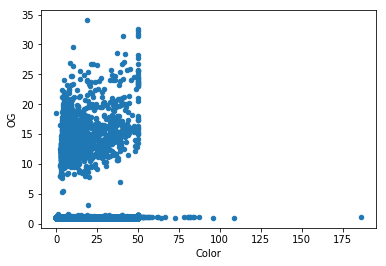

In [220]:
df.plot(kind='scatter',x='Color', y='OG')

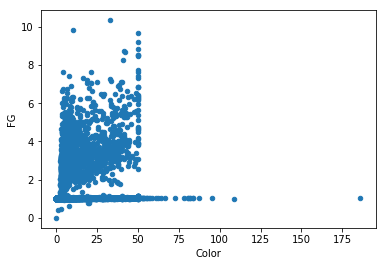

In [221]:
df.plot(kind='scatter',x='Color', y='FG')

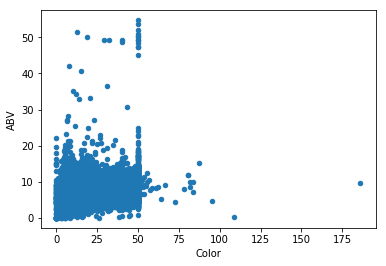

In [222]:
df.plot(kind='scatter',x='Color', y='ABV')

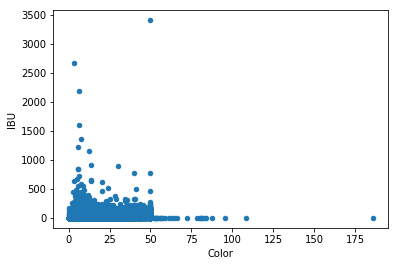

In [223]:
df.plot(kind='scatter',x='Color', y='IBU')

In [224]:
#Should we remove the outliers...?

In [225]:
model = sm.ols("Color ~ OG + FG", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Color   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.12e-54
Time:                        21:06:04   Log-Likelihood:            -2.8550e+05
No. Observations:               73265   AIC:                         5.710e+05
Df Residuals:                   73262   BIC:                         5.710e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2683      0.269     34.473      0.000       8.741       9.795
OG            -0.8277      0.062    -13.264      0.000      -0.950      -0.705
FG             4.9268      0.322     15.279      0.000       4.295       5.559
==============================================================================
Omnibus:                    20205.792   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45789.884
Skew:                           1.591   Prob(JB):                         0.00
Kurtosis:                       5.208   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
model = sm.ols("Color ~ ABV + OG", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Color   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2892.
Date:                Sun, 15 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:06:04   Log-Likelihood:            -2.8284e+05
No. Observations:               73265   AIC:                         5.657e+05
Df Residuals:                   73262   BIC:                         5.657e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7951      0.147     18.991      0.000       2.507       3.084
ABV            1.7213      0.023     75.951      0.000       1.677       1.766
OG             0.0305      0.019      1.578      0.115      -0.007       0.068
==============================================================================
Omnibus:                    18068.145   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38974.105
Skew:                           1.440   Prob(JB):                         0.00
Kurtosis:                       5.114   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
model = sm.ols("IBU ~ ABV + Color", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IBU   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3187.
Date:                Sun, 15 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:06:05   Log-Likelihood:            -3.7405e+05
No. Observations:               73265   AIC:                         7.481e+05
Df Residuals:                   73262   BIC:                         7.481e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0292      0.506     11.910      0.000       5.037       7.021
ABV            6.3647      0.082     77.887      0.000       6.205       6.525
Color         -0.0536      0.013     -4.175      0.000      -0.079      -0.028
==============================================================================
Omnibus:                   151116.241   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2806442046.589
Skew:                          16.787   Prob(JB):                         0.00
Kurtosis:                     961.228   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
#pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(16, 16));

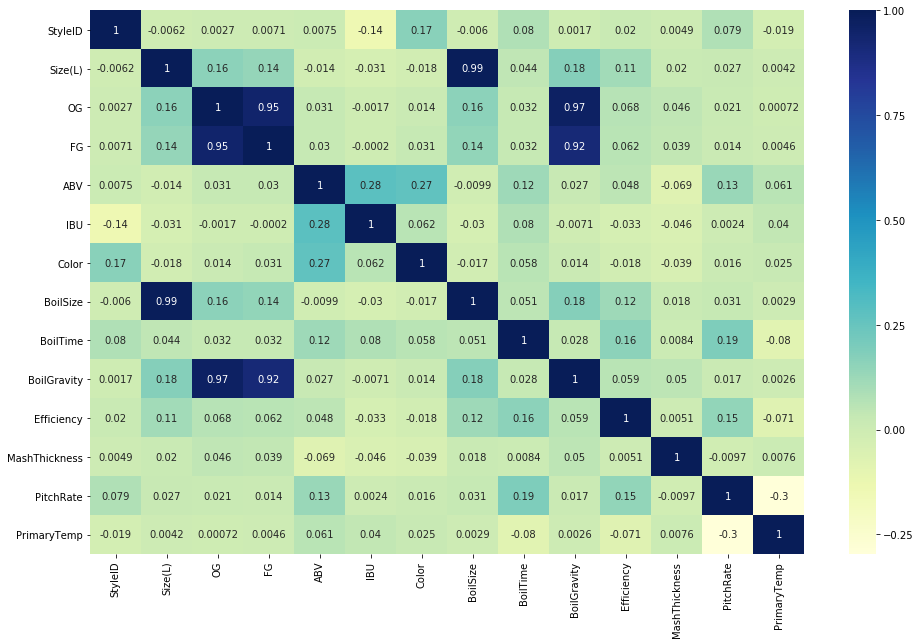

In [229]:
plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [230]:
#df.describe('Name')
#can someone help with name analysis? I'm thinking word count to start with
#I'm attempting a word cloud

wordcloud = WordCloud(background_color='white',
                          width=1200,
                          height=1000
                         ).generate((d.most_common(10)))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'd' is not defined